In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
input = pd.read_csv('train.csv', index_col=0)
input.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [30]:
input.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [31]:
input.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [32]:
input.isna().sum(axis=0)

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

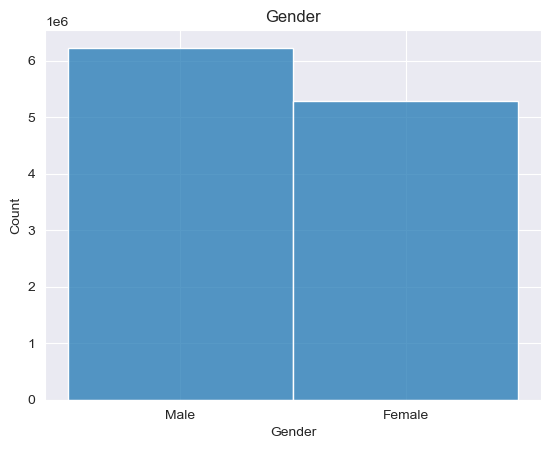

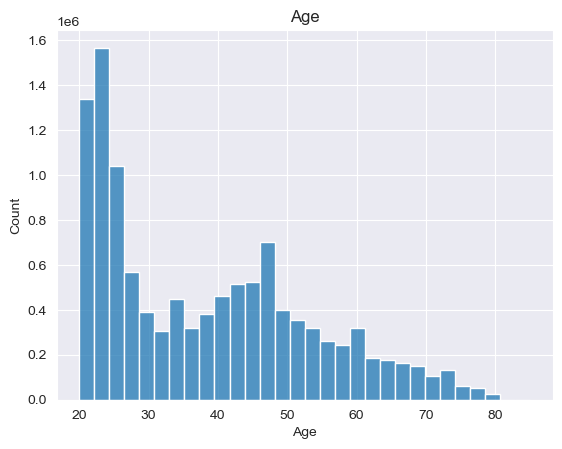

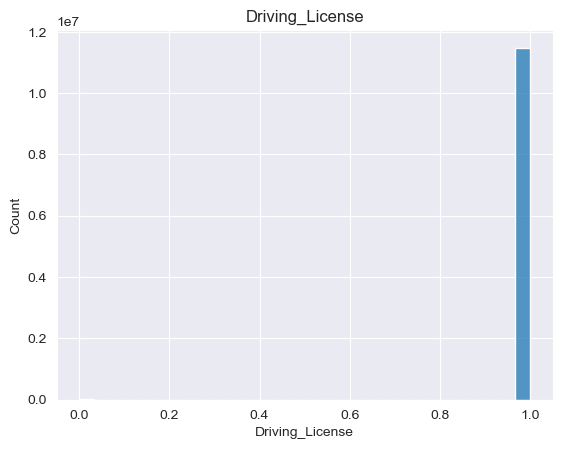

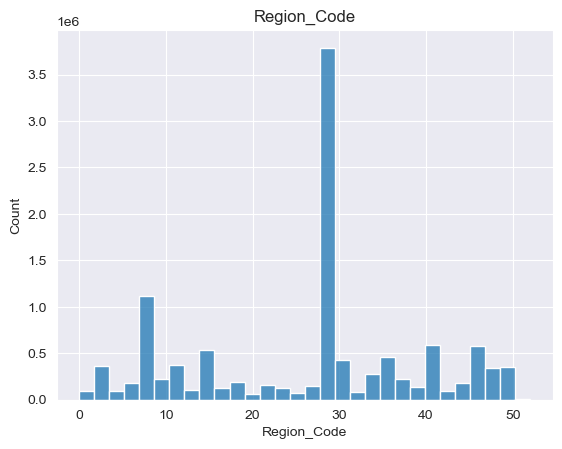

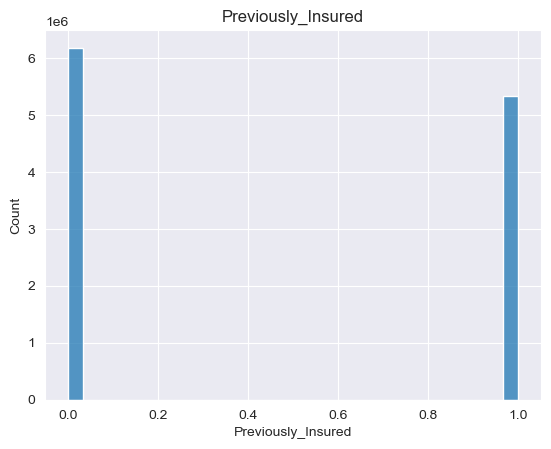

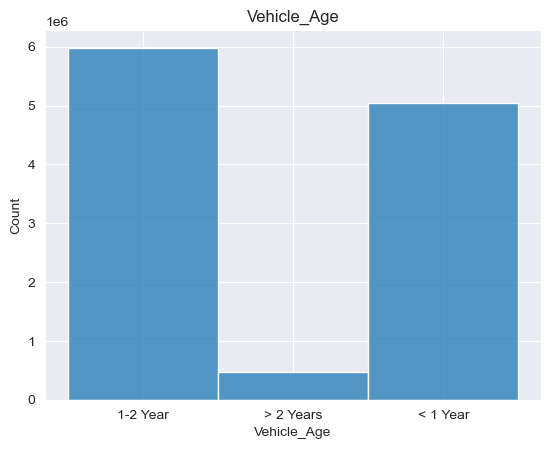

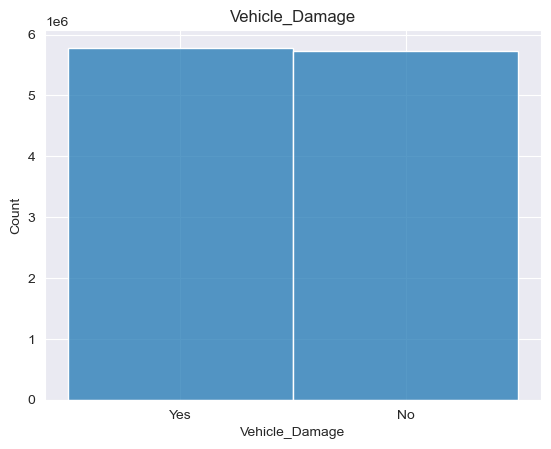

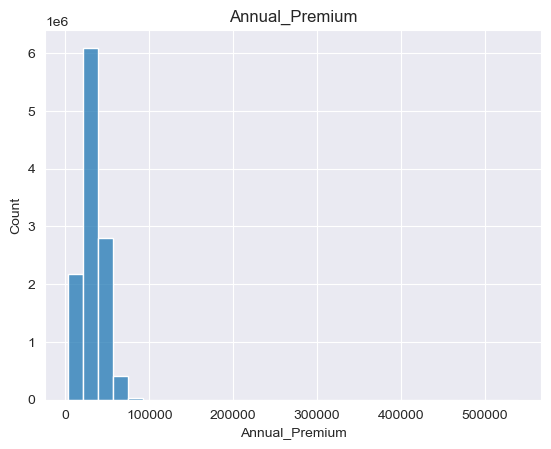

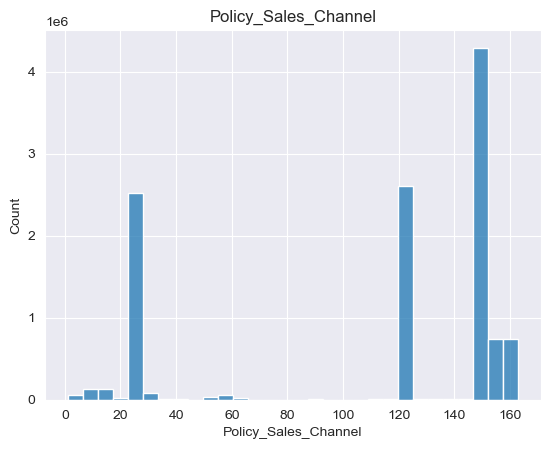

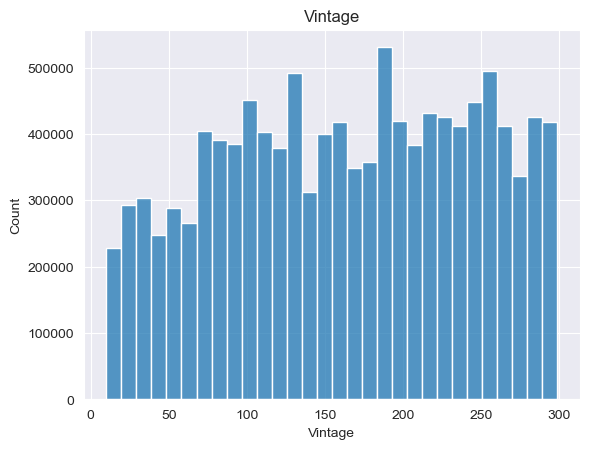

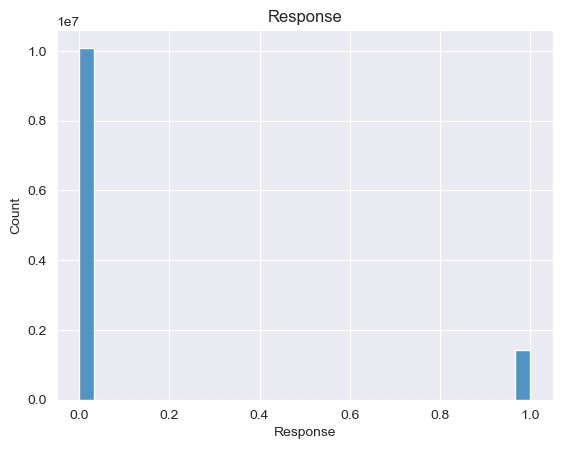

In [33]:
sns.set_style('darkgrid')
for col in input.columns:
    plt.figure()
    plt.title(col)
    sns.histplot(
        input,
        x=col,
        bins=30
    )

In [38]:
df = input.rename(columns={
    'Gender':'c_gender',
    'Driving_License':'c_license',
    'Region_Code':'c_region',
    'Previously_Insured':'c_prev',
    'Vehicle_Age':'c_vage',
    'Vehicle_Damage':'c_damage',
    'Policy_Sales_Channel':'c_channel',
    'Vintage':'c_vintage',
    'Age':'n_age',
    'Annual_Premium':'n_prem'
})
target = 'Response'
features = [col for col in df.columns if col != target]
categorical_features = [f for f in features if f.startswith('c_')]
numerical_features = [f for f in features if f.startswith('n_')]

In [39]:
categorical_features

['c_gender',
 'c_license',
 'c_region',
 'c_prev',
 'c_vage',
 'c_damage',
 'c_channel',
 'c_vintage']

In [40]:
for cat in categorical_features:
    print(f"Category {cat}: {len(df[cat].unique())} unique values")

Category c_gender: 2 unique values
Category c_license: 2 unique values
Category c_region: 54 unique values
Category c_prev: 2 unique values
Category c_vage: 3 unique values
Category c_damage: 2 unique values
Category c_channel: 152 unique values
Category c_vintage: 290 unique values


In [41]:
numerical_features

['n_age', 'n_prem']